In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#preparing X & y columns
X = df.drop(columns = ['math score'], axis = 1)
y = df['math score']

In [4]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
#create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
]
)
#this is a pipeline 
#here columntransformer will combine one hot encoder

In [13]:
X = preprocessor.fit_transform(X)

In [15]:
#separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((800, 19), (800,))

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

# Create an evaluate Function to give all metrics after model training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    #make predictions
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate Train and Test dataset
    
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean Absoulte Error : {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f} ".format(model_train_r2))
    
    print("--------------------------------------")
    
    
    print("Model performance for Test set")
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean Absoulte Error : {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f} ".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("*"*35)
    print("\n")
    
    
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error : 5.3231
- Mean Absoulte Error : 4.2667
- R2 Score: 0.8743 
--------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.3940
- Mean Absoulte Error : 4.2148
- R2 Score: 0.8804 
***********************************


Lasso
Model performance for Training set
- Root Mean Squared Error : 6.5938
- Mean Absoulte Error : 5.2063
- R2 Score: 0.8071 
--------------------------------------
Model performance for Test set
- Root Mean Squared Error : 6.5197
- Mean Absoulte Error : 5.1579
- R2 Score: 0.8253 
***********************************


Ridge
Model performance for Training set
- Root Mean Squared Error : 5.3233
- Mean Absoulte Error : 4.2650
- R2 Score: 0.8743 
--------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.3904
- Mean Absoulte Error : 4.2111
- R2 Score: 0.8806 
***********************************


Decision Tree
Model perfo

Results 

In [20]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ['Model Name', 'R2_score']).sort_values(by= ['R2_score'], ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
4,Random Forest Regressor,0.852049
1,Lasso,0.825320
3,Decision Tree,0.752526


In [21]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is ", score)

Accuracy of the model is  88.04332983749565


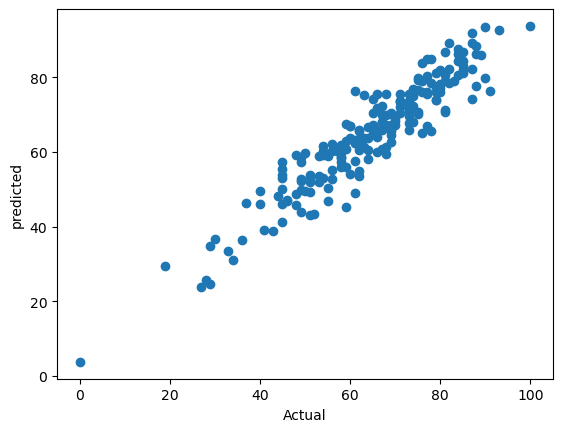

In [22]:
#plot y_pred and y_test

plt.scatter(y_test, y_pred);
plt.xlabel("Actual");
plt.ylabel('predicted');

<Axes: xlabel='math score'>

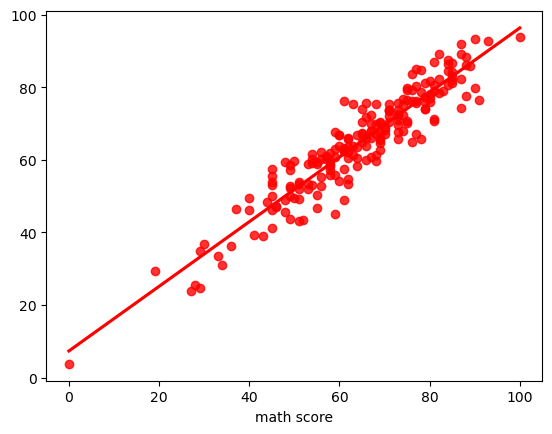

In [23]:
sns.regplot(x=y_test, y= y_pred, ci = None, color = "red")

In [24]:
#difference between actual and predicted values
pred_df = pd.DataFrame({"Actual value": y_test, "predicted value ": y_pred, "Difference ":  y_test-y_pred})
pred_df

,Actual value,predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
